<a href="https://colab.research.google.com/github/lorenzomazzante/ML01/blob/main/TD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML01 : TD3 - Classifieur de Bayes Naïf, QDA, LDA**

Réalisé par Cyprien Gilet et Khaled Belahcene

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats

# **Partie 1.** Classifieur de Bayes Naïf - Exercice d'application

## 1.1. Contexte et rappel du Classifieur de Bayes Naïf

Plaçons nous dans un contexte général où nous disposons d'un ensemble de $n$ observations labélisées (une base d'apprentissage contenant $n$ observations dont nous connaissons les classes). Notons $S = \left\{\left(Y^{(i)},X^{(i)}\right), i = 1,\dots,n\right\}$ cette base d'apprentissage et $K\geq 2$ le nombre de classes possibles à diagnostiquer (à prédire). Pour chaque observation $i\in\{1,\dots,n\}$,
- $X^{(i)} = [X_{1}^{(i)},\dots,X_{d}^{(i)}]$ correspondra au profil caractérisant l'observation $i$, $X^{(i)}$ est un vecteur aléatoire composé de $d$ variables descriptives.
- $Y^{(i)}\in\{1,\dots,K\}$ correspondra à la variable aléatoire (catégorielle) caractérisant la classe de l'observation $i$.

Nous nous plaçons de plus dans le contexte général où le modèles génératif ayant permis de générer les observations de la base d'apprentissage est inconnu. En d'autres termes, nous ne connaissons pas les densités de distributions des variables aléatoire $(Y^{(i)},X^{(i)})$.

Notre objectif central reste le même que pour les précédents TDs : Nous souhaitons apprendre un classifieur (une règle de décision) à partir des données d'apprentissage permettant de prédire (diagnostiquer) la classe $Y^{(i)}$ d'une observation $i$ à partir du profil $X^{(i)} = [X_{1}^{(i)},\dots,X_{d}^{(i)}]$ caractérisant cette observation.
Plus particulièrement dans ce TD, nous souhaitons apprendre le classifieur de Bayes Naïf.

**Le classifieur de Bayes Naïf** est un modèle probabiliste charchant à approximer la formule de Bayes en supposant que toutes les variables explicatives $\{X_{1}^{(i)},\dots,X_{d}^{(i)}\}$, composant le profil $X^{(i)}$ de chaque observation, sont statistiquement indépendantes les unes des autres.


**Question 1.1.1** Écrire la formule de Bayes permettant de modéliser la probabilité qu'une observation $i$ soit dans la classe $k\in\{1,\dots,K\}$ à partir du profile $X^{(i)} = [X_{1}^{(i)},\dots,X_{d}^{(i)}]$. En déduire la règle de décision du classifieur de Bayes permettant d'attribuer la classe la plus probable à une observation $X^{(i)} = x^{(i)}$ et simplifier là. Cette règle de décision simplifiée est communément appelée la "MAP rule" (règle de décision du Maximum A Posteriori).
    

**Question 1.1.2.** En supposant que toutes les variables explicatives $\{X_{1}^{(i)},\dots,X_{d}^{(i)}\}$ composant le profil $X^{(i)}$ de chaque observation sont indépendantes les unes des autres, comment pouvons-nous simplifier cette règle de décision du Maximum A Posteriori ?

**Intérêt de faire l'hypothèse d'indépendance entre variables.** Pour rappel, nous ne connaissons pas les densités de distributions des variables aléatoires $(Y^{(i)},X^{(i)})$. En particulier, nous ne connaissons pas la fonction de probabilité jointe $f_{X|Y=k}$ des variables caractéristiques dans chaque classe $k$ (également appelée la vraisemblance de chaque classe). Lorsque nous disposons d'un grand nombre $d$ de variables explicatives, l'estimation de cette la fonction de probabilité jointe $f_{X|Y=k}$ est très difficile (surtout lorsque nous travaillons avec des variables explicatives numériques (comme la température d'un patient) et d'autres catégorielles (comme l'état fumeur/non fumeur d'un patient).

D'après la question 2, l'hypothèse naïve d'indépendance entre variables descrptives permet de simplifier cette étape de modélisation de la vraisemblance puisque cela nous ramène à modéliser indépendamment la vraisemblance $f_{X_j|Y=k}$ de chaque variable $j\in\{1,\dots,d\}$ dans chaque classe $k\in\{1,\dots,K\}$.

## 1.2. Exercice d'application dans un contexte de variables descriptives catégorielles

On considère la base de données d'apprentissage suivante où les observations $A,\dots,J$ sont décrites par 2 variables catégorielles $\{X_1,X_2\}$. Chaque observation appartient à une classe $k\in\{1,2\}$ (notre variable d'intérêt).
- La variable $X_1$ peut prendre deux valeurs possible : $X_1\in\{1,2\}$.
- La variable $X_2$ peut prendre trois valeurs possible : $X_2\in\{1,2,3\}$.

| Observation | Variable $X_1$ | Variable $X_2$ | Classe $Y$ |
| --- | --- | --- | --- |
| A	| 1	| 2	| 1 |
| B	| 2	| 3	| 2 |
| C	| 2	| 1	| 1 |
| D	| 2	| 3	| 2 |
| E	| 1	| 1	| 1 |
| F	| 1	| 2	| 2 |
| G	| 1	| 1	| 1 |
| H	| 1	| 3	| 1 |
| I	| 2	| 1	| 1 |
| J	| 2	| 2	| 2 |

L'objectif de cet exercice est d'apprendre le classifieur de Bayes Naïf (par calculs sur papier) pour diagnostiquer la classe des observations test $K,L,M$ suivantes (on suppose que les classes réelles de ces observations test sont inconnues et on souhaite les retrouver grâce au classifieur de Bayes Naïf).

| Observation | Variable $X_1$ | Variable $X_2$ | Classe $Y$ |
| --- | --- | --- | --- |
| K	| 2	| 3	| 2 |
| L	| 1	| 2	| 2 |
| M	| 1	| 3	| 1 |

**Question 1.2.** À partir de vos estimations, calculer le taux d'erreur sur les 3 observations test en comparant vos résultats avec les classes réelles.

**Rappel.** Si la variable descriptive $j$ est une variable catégorielle à $T\geq 2$ valeurs possibles (par exemple est-ce qu'un patient est fumeur ou non), nous considérons que $(X_{j}^{(i)}|Y_i = k) \sim \mathrm{Cat}(T,[p_{j,k,1},\dots,p_{j,k,T}])$, où quelque soit $t \in \{1,\dots,T\}$,   $p_{j,k,t} = \mathbb{P}(X_{j}^{(i)} = t|Y^{(i)}=k)$.
Comme nous l'avons rappelé dans la première partie, la loi de $(X_{j}^{(i)}|Y^{(i)} = k)$ n'est pas connue est donc nous ne connaissons pas les paramètres $[p_{j,k,1},\dots,p_{j,k,T}]$. À partir de la base d'apprentissage, nous estimons donc ces paramètres de sotre que nos paramètres estimés rendent les observations de la base d'apprentissage les plus plausibles possible. Autrement dit nous les estimons par la méthode du maximum de vraisemblance. Ceci revient à calculer, pour chaque variable catégorielle $j$, pour chaque classe $k\in\{1,\dots,K\}$ et pour chaque catégorie $t \in \{1,\dots,T\}$ :
$$
\hat{p}_{j,k,t} \; = \; \hat{\mathbb{P}}\left(X_{j}^{(i)} = t \mid Y^{(i)}=k\right) \; = \; \frac{1}{n_k} \sum_{i\in\mathcal{I_k}} \mathbf{1}_{\{x_{j}^{(i)} = t\}},
$$
où $I_k$ correspond aux observations de la base d'apprentissage issues de la classe $k$ et $n_k$ correspond au nombre des ces observations issues de la classe $k$.

# **Partie 2.** Application du classifieur de Bayes Naifs, QDA, LDA en utilisant Scikit-Learn

## 2.1. Génération de la base d'apprentissage par gaussiennes multivariées

L'objectif de cette section est de générer une base d'apprentissage à partir d'un modèle de mixture gaussiennes multivariées.
- On se placera dans un contexte où l'on dispose de $d=2$ variables aléatoires descrptives et $K=2$ classes à prédire.
- On générera $n=1000$ observations telles que $n_1 = 500$ observations appartiendront à la classe 1 et $n_2 = 500$ observations à la classe 2.
- Pour chaque observation $i \in \{1,\dots,n\}$, $Y^{(i)}$ caractérisera la variable aléatoire décrivant la classe de l'observation $i$.
- Pour chaque observation $i \in \{1,\dots,n\}$, $X^{(i)} = \left[X_{1}^{(i)},X_{2}^{(i)}\right]$ caractérisera le vecteur aléatoire décrivant le profile de l'observation $i$, tel que :

  \begin{equation}
    X^{(i)} \sim \mathcal{N}\left(\mu^{(1)}, \Sigma^{(1)} \right) \; \text{si} \; Y^{(i)} = 1 \quad\quad \text{et} \quad\quad  X^{(i)} \sim \mathcal{N}\left(\mu^{(2)}, \Sigma^{(2)} \right) \; \text{si} \; Y^{(i)} = 2.
  \end{equation}

- On définira pour la suite :

  \begin{equation}
  \mu^{(1)} = [0, 0], \quad \mu^{(2)} = [0, 4], \quad \Sigma^{(1)} = \Sigma^{(2)} = \Sigma =
  \begin{bmatrix}
  2 & 1 \\
  1 & 3
  \end{bmatrix}.
  \end{equation}

**Question 2.1.1.** Générer une base d'apprentissage $\{YTrain, XTrain\}$ selon le modèle introduit ci-dessus. Pour cela, on pourra utiliser la fonction `rng.multivariate_normal` de `np.random.default_rng()`.

In [40]:
# RÉPONSE À LA QUESTION 2.1.1
np.random.seed(20)
n1 = 500
n2 = 500
n = n1 + n2
Cov = np.array([[2, 1], [1, 3]])
rng = np.random.default_rng(10)
mu1 = np.array([0, 0])
mu2 = np.array([0, 4])

XTrain = np.zeros((n, 2))
YTrain = np.zeros(n)
I2 = np.random.choice(2, n, replace=True)
YTrain[I2] = 2

for i in range(n):
    if I2[i] == 0:
        XTrain[i] = rng.multivariate_normal(mean=[0, 0], cov=Cov)
    else:
        XTrain[i] = rng.multivariate_normal(mean=[0, 4], cov=Cov)

In [34]:
# une autre maniere:
np.random.seed(20)
rng = np.random.default_rng()
X_k1 = rng.multivariate_normal(mean=[0, 0], cov=[[2, 1], [1, 3]], size=500)
X_k2 = rng.multivariate_normal(mean=[0, 4], cov=[[2, 1], [1, 3]], size=500)
XTrain = np.concatenate((X_k1, X_k2), axis=0)
YTrain = np.concatenate((np.ones(500), 2*np.ones(500)))

**Question 2.1.2.** Puisque l'on a $d=2$ variables descriptives, on peut représenter les nuages 2 points sur une figure 2D. Représenter les 2 nuages de points (scatter plot) de sorte à bien visualiser les observations de la classe 1 et celles de la classe 2.

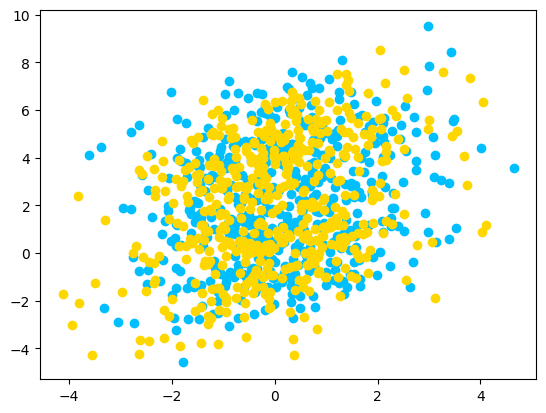

In [39]:
# RÉPONSE À LA QUESTION 2.1.2 :
plt.scatter(XTrain[0:499,0], XTrain[0:499,1],color='deepskyblue')
plt.scatter(XTrain[500:,0], XTrain[500:,1],color='gold')
plt.show()


## 2.2. Classifieurs LDA, QDA, Naive Bayes par Scikit-Learn

L'objectif de cette section est de calibrer et comparer les 3 classifieurs génératifs que nous avons étudiés depuis le début du cours, c'est à dire : Classifieur de Bayes Naïf, Quadratic Discriminant Analysis (QDA) et Linear Discriminant Analysis (LDA). Pour cela, nous ultiliserons les fonctions déjà implémentées par Scikit-Learn.
Vous trouverez plus d'informations concernant ces fonctions sur les pages suivantes :
- Classifieur de Bayes Naïf : https://scikit-learn.org/stable/modules/naive_bayes.html
- Quadratic Discriminant Analysis : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
- Linear Discriminant Analysis : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

**Question 2.2.1** Calibrer les classifieurs Naive Bayes, LDA et QDA sur la base d'apprentissage générée dans la section précédente.

In [43]:
# RÉPONSE À LA QUESTION 2.2.1 :

classifierNB = GaussianNB()
classifierNB.fit(XTrain, YTrain)

classifierLDA = LinearDiscriminantAnalysis()
classifierLDA.fit(XTrain, YTrain)

classifierQDA = QuadraticDiscriminantAnalysis()
classifierQDA.fit(XTrain, YTrain)

# Prediction et evaluation des classifieurs

YPredNB_proba = classifierNB.predict_proba(XTrain)
YPredLDA_proba = classifierLDA.predict_proba(XTrain)
YPredQDA_proba = classifierQDA.predict_proba(XTrain)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [44]:
print('Predictions NB' ,YPredNB_proba)
print('Predictions LDA' ,YPredLDA_proba)
print('Predictions QDA' ,YPredQDA_proba)

Predictions NB [[9.90004810e-01 9.99518966e-03]
 [9.97737707e-01 2.26229338e-03]
 [9.97946720e-01 2.05328018e-03]
 ...
 [9.97101985e-01 2.89801531e-03]
 [9.98833657e-01 1.16634290e-03]
 [9.99996247e-01 3.75309434e-06]]
Predictions LDA [[9.95000489e-01 4.99951050e-03]
 [9.98368646e-01 1.63135353e-03]
 [9.98105056e-01 1.89494371e-03]
 ...
 [9.97845629e-01 2.15437063e-03]
 [9.98561614e-01 1.43838620e-03]
 [9.99132910e-01 8.67089527e-04]]
Predictions QDA [[6.76011023e-14 1.00000000e+00]
 [6.96725314e-11 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]]


**Question 2.2.2.** Afficher les frontières de décision de chaque classifieur sur 3 subplots. Pour cela on pourra s'aider de la page Scikit-Learn suivante : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
# RÉPONSE À LA QUESTION 2.2.2 :



## 2.3. Lorsque les matrices de covariances diffèrent par classe

L'objectif de cette section est de générer une nouvelle base d'apprentissage avec les prarmètres suivant :

\begin{equation}
    \mu^{(1)} = [0, 0], \quad \mu^{(2)} = [0, 4], \quad
    \Sigma^{(1)} = \begin{bmatrix}
             2 & 1 \\
             1 & 3
            \end{bmatrix}, \quad
    \Sigma^{(2)} = \begin{bmatrix}
             6 & -3 \\
             -3 & 3.5
            \end{bmatrix}.
\end{equation}

**Question 2.3.1.** En reprenant le code de la section 1, génerer une nouvelle base d'apprentissage avec ces nouveaux paramètres et afficher le scatter plot associé.

In [ ]:
# RÉPONSE À LA QUESTION 2.3.1 :


**Question 2.3.2.** Calibrer les classifieurs Naive Bayes, LDA et QDA sur cette nouvelle base d'apprentissage et calculer leur taux d'erreurs respectifs sur la base d'apprentissage (reprendre le même code que dans la section 2).

In [ ]:
# RÉPONSE À LA QUESTION 2.3.2 :



**Question 2.3.3.** Afficher les forntières de décision de chaque classifieur sur cette nouvelle base de données (en réutilisant les mêmes codes que dans la section 2).

In [ ]:
# RÉPONSE À LA QUESTION 2.3.3 :


# **Partie 3.** Implémentation du classifieur de Bayes naïf "from scratch"

### 3.1. Implémentation du classifieur de Bayes naïf

D'après les rappels en Partie 1, nous avons besoin de modéliser indépendamment la fonction de probabilité $f_{X_j|Y=k}$ de chaque variable descriptive $j\in\{1,\dots,d\}$ dans chaque classe $k\in\{1,\dots,K\}$, ainsi que les probabilités à priori $\mathbb{P}(Y^{(i)}=k)$ de chaque classe, le tout à partir des données d'apprentissage.

**Question 3.1.1.** Concernant l'estimation des probabilités à priori de chaque classe, une approche usuelle est de les approximer en calculant les proportions par classe dans la base d'apprentissage. Autrement dit, les probabilités à priori $\mathbb{P}(Y^{(i)}=k)$ de chaque classe $k\in\{1,\dots,K\}$ sont estimées par :
$$
\hat{\mathbb{P}}(Y^{(i)}=k) \; = \; \frac{1}{n} \sum_{i\in\mathcal{I}} \mathbf{1}_{\{Y^{(i)} = k\}}.
$$
Implémenter une fonction permetant d'estimer les probabilités à priori $\mathbb{P}(Y^{(i)}=k)$ de chaque classe $k\in\{1,\dots,K\}$ à partir des données d'apprentissage.

In [ ]:
# RÉPONSE À LA QUESTION 3.1.1 :




**Question 3.1.2.** Concernant la modélisation des fonctions de probabilité $f_{X_j|Y=k}$ de chaque variable descriptive $j\in\{1,\dots,d\}$ dans chaque classe, une approche usuelle est la suivante :

- Si la variable descriptive $j$ est une variable catégorielle à $T\geq 2$ valeurs possibles (par exemple est-ce qu'un patient est fumeur ou non), nous considérons que $(X_{j}^{(i)}|Y_i = k) \sim \mathrm{Cat}(T,[p_{j,k,1},\dots,p_{j,k,T}])$, où quelque soit $t \in \{1,\dots,T\}$,   $p_{j,k,t} = \mathbb{P}(X_{j}^{(i)} = t|Y^{(i)}=k)$.
  Comme nous l'avons rappelé dans la première partie, la loi de $(X_{j}^{(i)}|Y^{(i)} = k)$ n'est pas connue est donc nous ne connaissons pas les paramètres $[p_{j,k,1},\dots,p_{j,k,T}]$. À partir de la base d'apprentissage, nous estimons donc ces paramètres de sotre que nos paramètres estimés rendent les observations de la base d'apprentissage les plus plausibles possible. Autrement dit nous les estimons par la méthode du maximum de vraisemblance. Ceci revient à calculer, pour chaque variable catégorielle $j$, pour chaque classe $k\in\{1,\dots,K\}$ et pour chaque catégorie $t \in \{1,\dots,T\}$ :
  
  \begin{equation}
  \hat{p}_{j,k,t} \; = \; \hat{\mathbb{P}}\left(X_{j}^{(i)} = t \mid Y^{(i)}=k\right) \; = \; \frac{1}{n_k} \sum_{i\in\mathcal{I}_k} \mathbf{1}_{\{x_{j}^{(i)} = t\}},
  \end{equation}
  
    où $I_k$ correspond aux observations de la base d'apprentissage issues de la classe $k$ et $n_k$ correspond au nombre des ces observations issues de la classe $k$.
  

- Si la variable descriptive $j$ est une variable numérique, une approche usuelle est alors de modéliser les distributions de $(X_{j}^{(i)}|Y^{(i)} = k)$ par des gaussiennes dont les moyennes et variances sont à estimer à partir de la base d'apprentissage, en cherchant à maximiser la vraisemblance par classe. Autrement dit, on estime que pour chaque variable numérique $j$ et pour chaque classe $k\in\{1,\dots,K\}$, $(X_{j}^{(i)}|Y^{(i)} = k) \sim \mathcal{N}(\hat{\mu}_{jk},\hat{\sigma}_{jk}^2)$, où d'après le cours, les paramètres $\left\{\hat{\mu}_{jk},\hat{\sigma}_{jk}^2\right\}$ sont estimés par

    \begin{equation}
    \hat{\mu}_{jk} = \frac{1}{n_k} \sum_{i\in I_k} x_{j}^{(i)}
    \quad \quad \text{et} \quad \quad
    \hat{\sigma}_{jk}^2 = \frac{1}{n_k} \sum_{i\in I_k} \left(x_{j}^{(i)} - \hat{\mu}_{jk} \right)^2.
    \end{equation}
    
  De ce fait, la densité $\hat{f}_{X_j|Y=k}\left(x_{j}^{(i)}\right)$ de chaque variable descriptive numérique $j$ dans chaque classe $k$ est estimée par
  
    \begin{equation}
    \hat{f}_{X_j|Y=k}\left(x_{j}^{(i)}\right) \;=\; \frac{1}{\hat{\sigma}_{jk} \sqrt{2\pi}} \, \mathrm{exp}\left( -\frac{(x_{j}^{(i)}-\hat{\mu}_{jk})^2}{2\hat{\sigma}_{jk}^2}\right).
    \end{equation}
    
    
- **Question :**  Implémenter une fonction permettant d'estimer les paramètres de la fonction de probabilité (ou fonction de masse) d'une variable catégorielle $j$ dans chaque classe $k$. Implémenter ensuite une fonction permettant d'estimer les paramètres de la fonction de probabilité (ou densité) d'une variable numérique $j$ dans chaque classe $k$.

In [ ]:
# RÉPONSE À LA QUESTION 3.1.2 :



### 3.2. Application du classifieur de Bayes Naïf Empirique sur données synthétiques

Compiler la cellule ci-dessous permettant de générer une base de données d'apprentissage contenant nTrain = 100 observations et une base de test contenant 900 observations.
- Chaque observation est décrite par 3 variables : les deux premières variables sont numériques et la 3ème variable est une variable catégorielle avec $T=4$ catégories possibles.
- Nous avons $K=2$ classes à prédire à partir de ces 3 variables descriptives.

In [ ]:
# Génération base de données

np.random.seed(10)

K = 2

mu11 = 37.8
mu12 = 39
sigma11 = 0.4
sigma12 = 0.3

mu21 = 7
mu22 = 8
sigma21 = 0.7
sigma22 = 1

T = 4
pHat = np.zeros((K,T))
pHat[0,0]=0.1
pHat[0,1]=0.2
pHat[0,2]=0.5
pHat[0,3]=1-(pHat[0,0]+pHat[0,1]+pHat[0,2])
pHat[1,0]=0.3
pHat[1,1]=0.1
pHat[1,2]=0.2
pHat[1,3]=1-(pHat[1,0]+pHat[1,1]+pHat[1,2])

priori_2 = 0.3


# Génération de la base d'apprentissage :

nTrain = 100
YTrain = np.zeros(nTrain)
XTrain = np.zeros((nTrain,3))

for i in range(0,nTrain):
    YTrain[i] = np.random.binomial(1, priori_2) + 1
    if YTrain[i]==1:
        XTrain[i,0] = np.random.normal(mu11, sigma11)
        XTrain[i,1] = np.random.normal(mu21, sigma21)
        XTrain[i,2] = np.random.choice(T, 1, p=pHat[0])[0]
    if YTrain[i]==2:
        XTrain[i,0] = np.random.normal(mu12, sigma12)
        XTrain[i,1] = np.random.normal(mu22, sigma22)
        XTrain[i,2] = np.random.choice(T, 1, p=pHat[1])[0]


# Génération de la base de test :

nTest= 900
YTest = np.zeros(nTest)
XTest = np.zeros((nTest,3))

for i in range(0,nTest):
    YTest[i] = np.random.binomial(1, priori_2) + 1
    if YTest[i]==1:
        XTest[i,0] = np.random.normal(mu11, sigma11)
        XTest[i,1] = np.random.normal(mu21, sigma21)
        XTest[i,2] = np.random.choice(T, 1, p=pHat[0])[0]
    if YTest[i]==2:
        XTest[i,0] = np.random.normal(mu12, sigma12)
        XTest[i,1] = np.random.normal(mu22, sigma22)
        XTest[i,2] = np.random.choice(T, 1, p=pHat[1])[0]


print('YTrain =', YTrain)
print('XTrain =', XTrain)

**Question 3.2.1.** Estimer sur la base d'apprentissage les paramètres introduits dans la section 2, pour chaque variable indépendamment, à partir des trois fonctions implémentées lors des questions 3.1.1. et 3.1.2.

In [ ]:
# RÉPONSE À LA QUESTION 3.1 :


**Question 3.2.2.** Appliquer le classifieur de Bayes Naïf sur les observations de la base de test et calculer le taux d'erreur global de ce classifieur.

In [ ]:
# RÉPONSE À LA QUESTION 3.2 :
